In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
dataSet="Dataset/car dataset.csv"

In [4]:
df=pd.read_csv(dataSet)

In [5]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [6]:
df.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [7]:
df['Make'].value_counts()

Toyota    379
Honda     292
Nissan    183
BMW        97
Name: Make, dtype: int64

In [8]:
df['Colour'].value_counts()

White    390
Blue     302
Black     95
Red       88
Green     75
Name: Colour, dtype: int64

In [9]:
df['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [10]:
df['Odometer (KM)'].dtypef='float64'

In [11]:
df['Doors'].dtypef='float64'

In [12]:
df['Price'].dtypef='float64'

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Odometer (KM),950.0,131253.237895,69094.857187,10148.0,70391.25,131821.0,192668.50,249860.0
Doors,950.0,4.011579,0.382539,3.0,4.00,4.0,4.00,5.0
Price,950.0,16042.814737,8581.695036,2796.0,9529.25,14297.0,20806.25,52458.0


In [14]:
df['Make'].fillna('Toyota',inplace=True)
df['Colour'].fillna('White',inplace=True)
df['Odometer (KM)'].fillna(df['Odometer (KM)'].mean(),inplace=True)
df['Doors'].fillna(4.0,inplace=True)
df['Price'].fillna(df['Price'].mean(),inplace=True)

In [15]:
df.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [16]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [17]:
df.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,Toyota,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [18]:
x=np.array(df.drop(['Make','Colour','Price','Doors'],axis=1))
y=np.array(df.Price)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=542)

In [20]:
len(x_train)

800

In [21]:
len(y_train)

800

In [22]:
len(x_test)

200

In [23]:
len(y_test)

200

In [24]:
model=LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_test

array([20075.        , 12152.        ,  7469.        ,  6160.        ,
       33817.        ,  7425.        , 16138.        ,  8687.        ,
       10241.        ,  4001.        , 15666.        , 18180.        ,
        9374.        ,  9290.        ,  6010.        , 18306.        ,
       35687.        ,  4566.        , 16042.81473684, 16042.81473684,
       10596.        , 25104.        , 31570.        , 11121.        ,
       14404.        , 32676.        , 21242.        , 15662.        ,
       11479.        , 21326.        , 27868.        ,  8226.        ,
       15879.        , 16908.        ,  9521.        , 14043.        ,
       16042.81473684, 10101.        , 18355.        , 10377.        ,
       28414.        , 14204.        , 14671.        ,  3594.        ,
       29089.        , 33353.        , 12086.        , 52458.        ,
       20100.        ,  6391.        ,  4200.        ,  5094.        ,
        9402.        , 11092.        ,  8809.        , 32887.        ,
      

In [27]:
y_pred=model.predict(x_test)

In [28]:
y_pred

array([16528.24987671, 12374.71752156, 17468.99265661, 20841.14721628,
       19497.92806182, 12486.50705803, 11187.75690456, 17506.52534453,
       19788.91277838, 12382.93045667, 16749.19059744, 16119.64571637,
       16014.70738483, 18941.95916421, 12385.61136295, 16239.69074202,
       20278.79520848, 13690.91484288, 14220.33000209, 19001.74762967,
       13319.50293792, 15249.58524331, 18735.35916438, 15859.68291533,
       14168.83957989, 19049.49329389, 16034.40991829, 18078.53712575,
       17425.92793986, 20946.42598036, 20622.50441522, 11129.96848031,
       11935.77231078, 16552.20781696, 20437.01123308, 13842.79031135,
       14109.51920918, 16815.19195681, 13431.93078541, 14543.91113469,
       20312.83846284, 20354.24357094, 15984.27110287, 12614.29692405,
       19733.50738193, 20676.63318964, 11982.79455585, 20877.10540369,
       17842.14927836, 12163.05358763, 12634.29733598, 15984.27110287,
       12584.16864395, 14178.28658297, 15729.80789999, 15984.27110287,
      

In [29]:
model.score(x_test,y_test)

0.26535906759645356

In [30]:
r2_score(y_test,y_pred)

0.26535906759645356

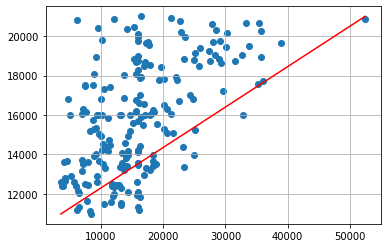

In [31]:
plt.scatter(y_test,y_pred)
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')